Step 1:
Importing and Data reading

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
df = pd.read_csv('Food_Inspections.csv')

Step 2:
Information about data, filter  and visualizing 

In [25]:
df.head()


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2587265,AREPA GEORGE,AREPA GEORGE,2522680.0,Restaurant,Risk 1 (High),1552 N KEDZIE AVE,CHICAGO,IL,60651.0,12/20/2023,Canvass Re-Inspection,Pass,NaN,41.909898,-87.707145,"(41.909897849174, -87.70714515263228)"
1,2587168,MARGARITA'S PIZZERIA,MARGARITA'S PIZZERIA,48819.0,Restaurant,Risk 1 (High),2705 - 2707 E 79TH ST,CHICAGO,IL,60649.0,12/19/2023,Complaint Re-Inspection,Pass,NaN,41.751723,-87.558700,"(41.75172337100072, -87.55869963532268)"
2,2587169,BRISTOL FOOD & LIQUOR,BRISTOL FOOD & LIQUOR,2943885.0,Grocery Store,Risk 3 (Low),5201-5207 W BELMONT AVE,CHICAGO,IL,60641.0,12/19/2023,License,Pass,NaN,41.938589,-87.756810,"(41.93858918622007, -87.75681004516909)"
3,2587086,FARMAIR'S MARKET,FARMER'S MARKET (T5 / M7),2944236.0,Grocery Store,Risk 3 (Low),11601 W TOUHY AVE,CHICAGO,IL,60666.0,12/18/2023,License,Pass,NaN,42.008536,-87.914428,"(42.008536400868735, -87.91442843927047)"
4,2587088,URBAN LUXE CAFE INC.,URBAN LUXE CAFE INC.,2917499.0,Restaurant,Risk 2 (Medium),2911 E 79TH ST,CHICAGO,IL,60649.0,12/18/2023,License,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.751791,-87.553571,"(41.751791151661955, -87.55357107463779)"


In [26]:
df.shape


(265145, 17)

In [27]:
df.dtypes

Inspection ID        int64
DBA Name            object
AKA Name            object
License #          float64
Facility Type       object
Risk                object
Address             object
City                object
State               object
Zip                float64
Inspection Date     object
Inspection Type     object
Results             object
Violations          object
Latitude           float64
Longitude          float64
Location            object
dtype: object

In [28]:
#Showing Unique values of each Column
data_types = df.dtypes

unique_value_counts = df.nunique()

info_combined = pd.concat([data_types, unique_value_counts], axis=1)
info_combined.columns = ['Data Types', 'Unique Value Counts']

print(info_combined)

                Data Types  Unique Value Counts
Inspection ID        int64               265145
DBA Name            object                32024
AKA Name            object                30484
License #          float64                44293
Facility Type       object                  511
Risk                object                    4
Address             object                19593
City                object                   78
State               object                    5
Zip                float64                  121
Inspection Date     object                 3529
Inspection Type     object                  110
Results             object                    7
Violations          object               191257
Latitude           float64                18172
Longitude          float64                18172
Location            object                18172


In [29]:
#Droping Columns
columns_to_drop = ['Inspection ID','AKA Name','Latitude','Longitude','Address']
df = df.drop(columns_to_drop,axis = 1)
df.head()

,DBA Name,License #,Facility Type,Risk,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Location
0,AREPA GEORGE,2522680.0,Restaurant,Risk 1 (High),CHICAGO,IL,60651.0,12/20/2023,Canvass Re-Inspection,Pass,NaN,"(41.909897849174, -87.70714515263228)"
1,MARGARITA'S PIZZERIA,48819.0,Restaurant,Risk 1 (High),CHICAGO,IL,60649.0,12/19/2023,Complaint Re-Inspection,Pass,NaN,"(41.75172337100072, -87.55869963532268)"
2,BRISTOL FOOD & LIQUOR,2943885.0,Grocery Store,Risk 3 (Low),CHICAGO,IL,60641.0,12/19/2023,License,Pass,NaN,"(41.93858918622007, -87.75681004516909)"
3,FARMAIR'S MARKET,2944236.0,Grocery Store,Risk 3 (Low),CHICAGO,IL,60666.0,12/18/2023,License,Pass,NaN,"(42.008536400868735, -87.91442843927047)"
4,URBAN LUXE CAFE INC.,2917499.0,Restaurant,Risk 2 (Medium),CHICAGO,IL,60649.0,12/18/2023,License,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,"(41.751791151661955, -87.55357107463779)"


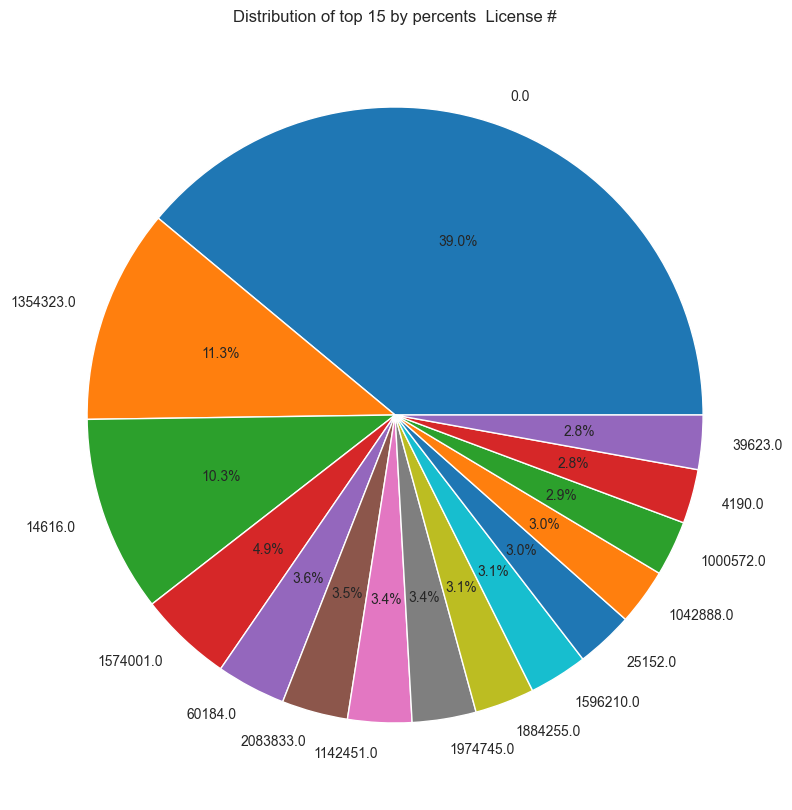

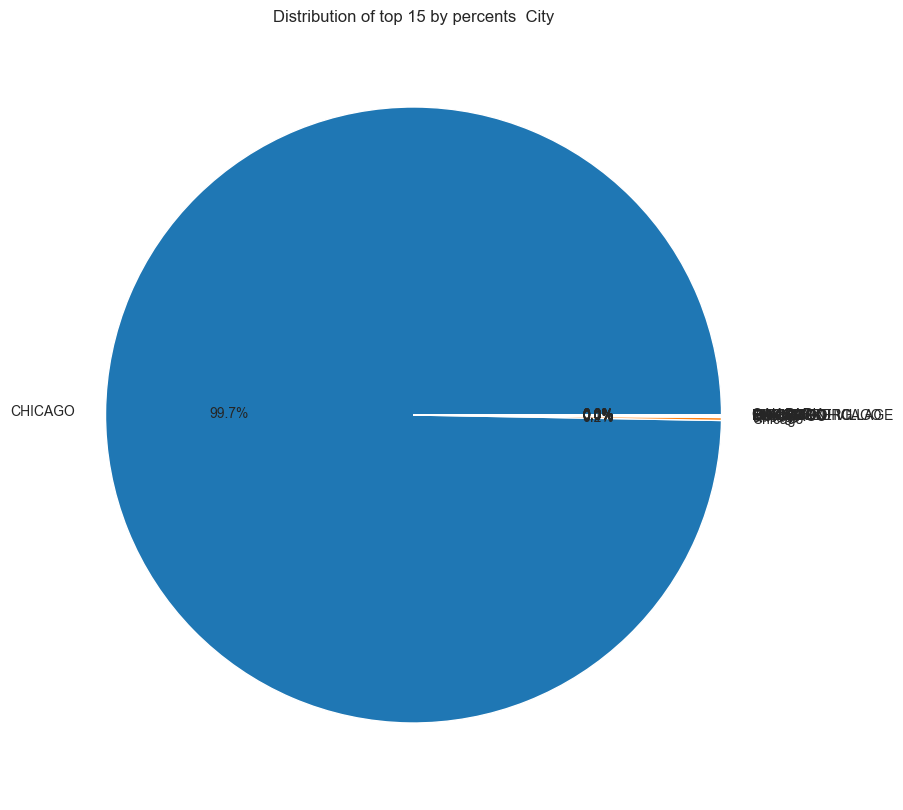

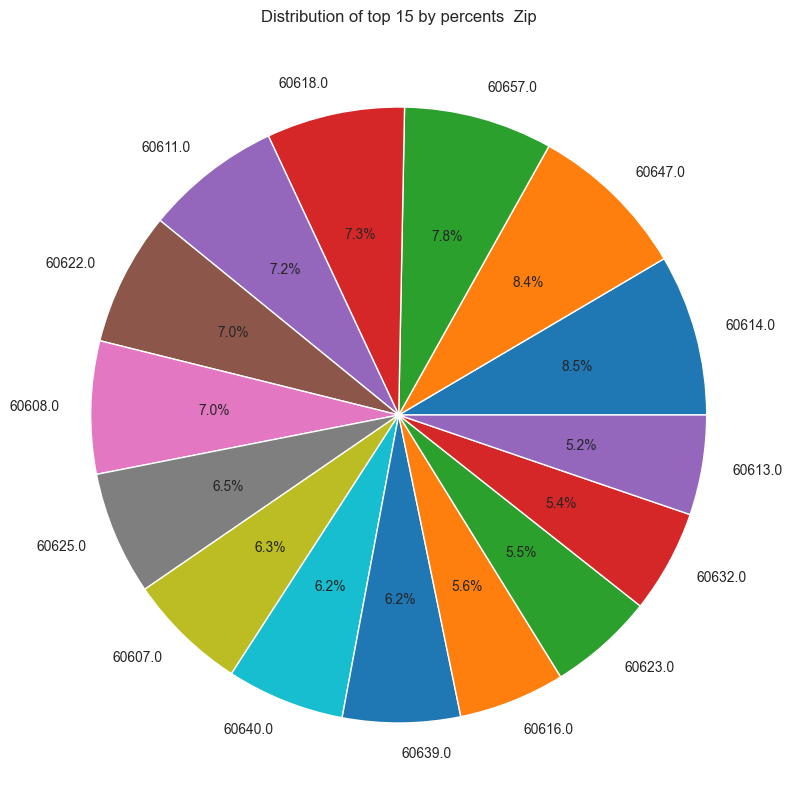

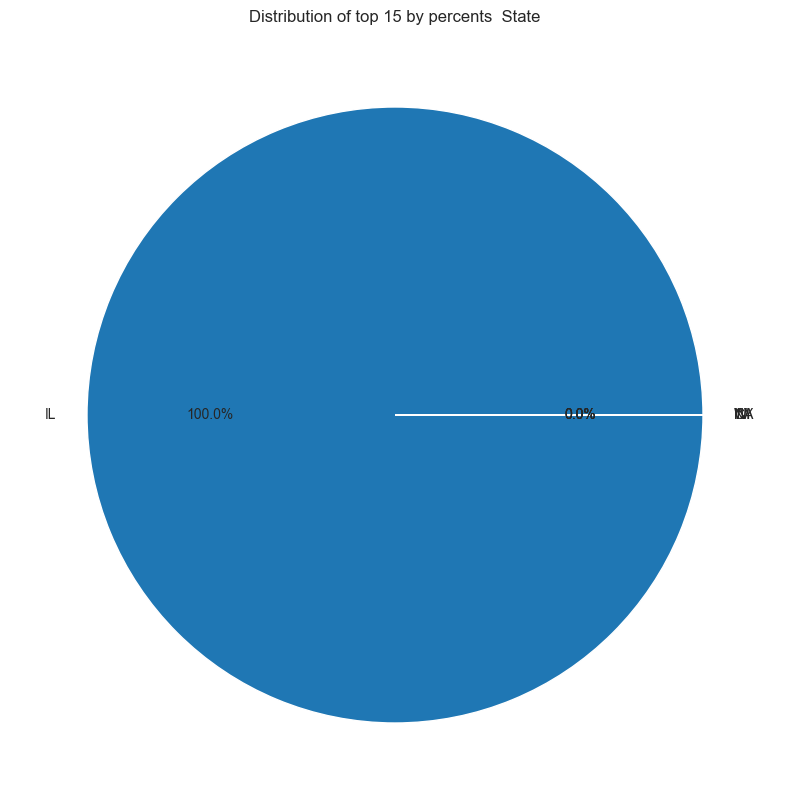

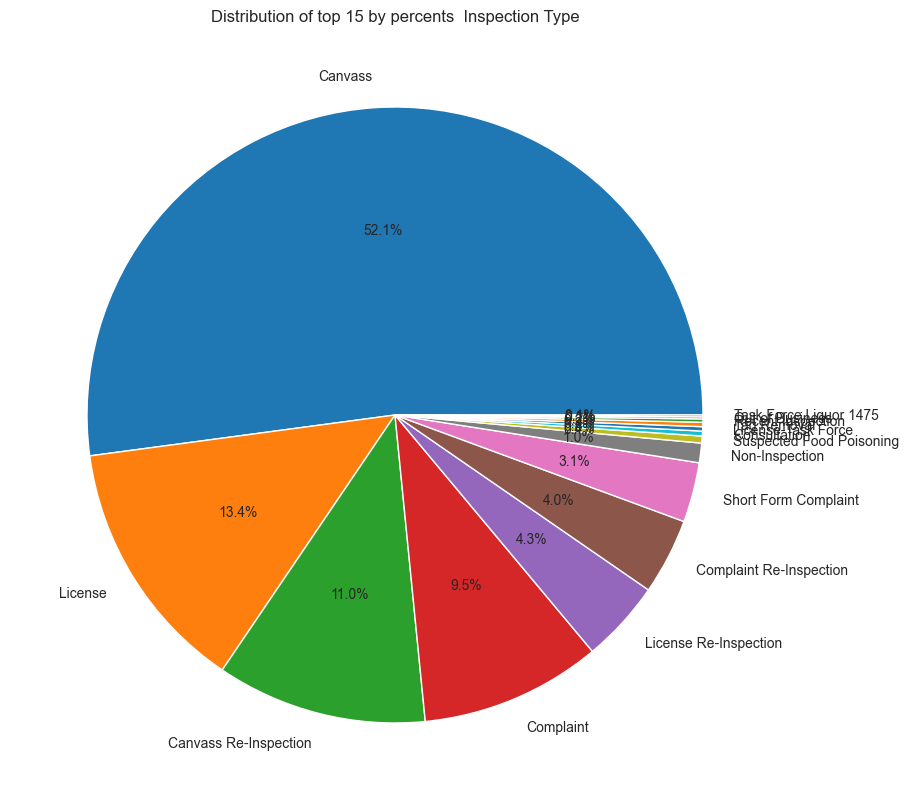

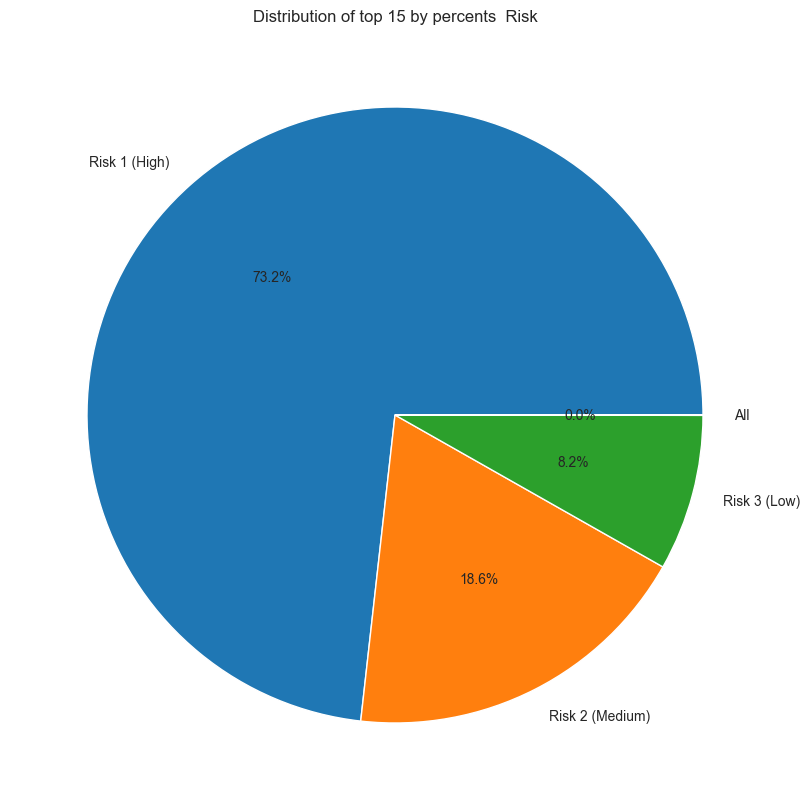

In [30]:
#Visualising some data columns for understanding the importance
columns_to_visualize = ['License #','City','Zip','State','Inspection Type','Risk']

for column in columns_to_visualize:
    # Calculate value counts with percentages for the column
    value_counts = df[column].value_counts(normalize=True).head(15) * 100
    
    value_counts = value_counts.dropna()
    
    plt.figure(figsize=(10, 10))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of top 15 by percents  {column}')
    plt.show()


In [31]:
#Droping features and rows with useless information
for index,city in df['City'].items():
    if city != 'CHICAGO':
        df.drop(index,inplace = True)
for index,rows in df['Risk'].items():
    if rows == 'All':
        df.drop(index,inplace = True)
#droping columns
columns_to_drop = ['Zip','State','City']
df = df.drop(columns_to_drop,axis=1)


In [32]:
#Drop duplicated rows
df.duplicated().sum()#Dublicated rows sum
df = df.drop_duplicates()#deleting 
#reseting indexes
df.reset_index(drop=True, inplace=True)

In [33]:
#checking columns with 0 information rows counts

df.isna().sum()

DBA Name               0
License #             18
Facility Type       5029
Risk                  74
Inspection Date        0
Inspection Type        1
Results                0
Violations         71854
Location             676
dtype: int64

Cleaning Results column by saving only Pass ,Fail and Pass w/ Conditions and replacing them from categorical type to numerical accepting that Pass and Pass w/ Conditions are Same 

In [34]:
#Only consider successful inspections
df = df[~df.Results.isin(["Out of Business", "Business Not Located", "No Entry", "Not Ready"])]
#replaceing from Categorical type to int 
replacement_map = {'Pass': 1, 'Pass w/ Conditions': 1, 'Fail': 0}
df['Results'] = df['Results'].replace(replacement_map).astype(int)

Trying to find connection with 0.0 licence,risk and results features  

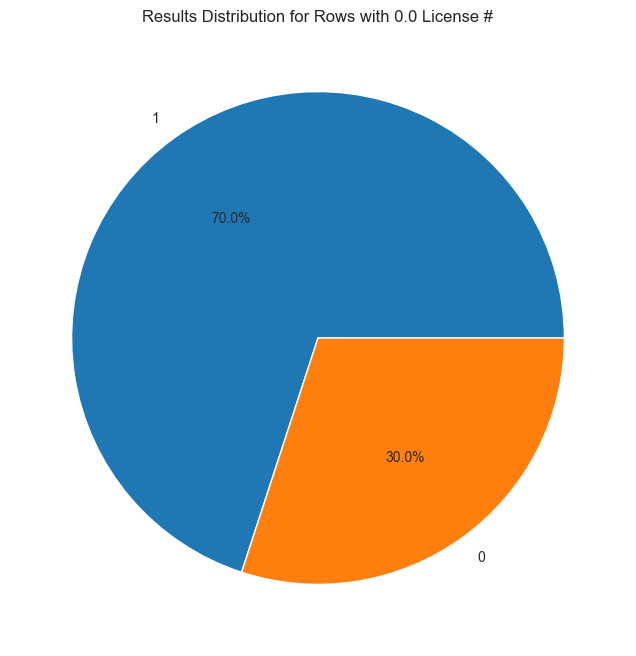

In [35]:
zero_license_rows = df[df['License #'] == 0.0]

# Calculate value counts for 'Results' within this subset
result_counts = zero_license_rows['Results'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%')
plt.title('Results Distribution for Rows with 0.0 License #')
plt.show()

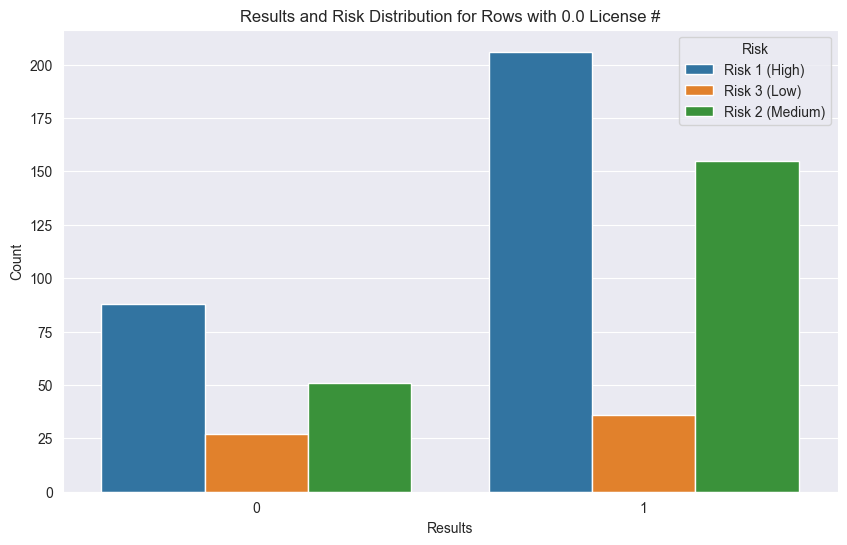

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=zero_license_rows, x='Results', hue='Risk')
plt.title('Results and Risk Distribution for Rows with 0.0 License #')
plt.xlabel('Results')
plt.ylabel('Count')
plt.legend(title='Risk')
plt.show()

In [41]:
#Droping License column
df = df[~((df['License #'] == 0.0) & (df['Risk'] == 'Risk 1 (High)') & (df['Inspection Type'] == 'License'))]

df = df.drop('License #',axis=1)

In [42]:
df.head()

,DBA Name,Facility Type,Risk,Inspection Date,Inspection Type,Results,Violations,Location
0,AREPA GEORGE,Restaurant,Risk 1 (High),12/20/2023,Canvass Re-Inspection,1,NaN,"(41.909897849174, -87.70714515263228)"
1,MARGARITA'S PIZZERIA,Restaurant,Risk 1 (High),12/19/2023,Complaint Re-Inspection,1,NaN,"(41.75172337100072, -87.55869963532268)"
2,BRISTOL FOOD & LIQUOR,Grocery Store,Risk 3 (Low),12/19/2023,License,1,NaN,"(41.93858918622007, -87.75681004516909)"
3,FARMAIR'S MARKET,Grocery Store,Risk 3 (Low),12/18/2023,License,1,NaN,"(42.008536400868735, -87.91442843927047)"
4,URBAN LUXE CAFE INC.,Restaurant,Risk 2 (Medium),12/18/2023,License,1,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,"(41.751791151661955, -87.55357107463779)"



Focus on the facility types: Restaurant, Grocery, School


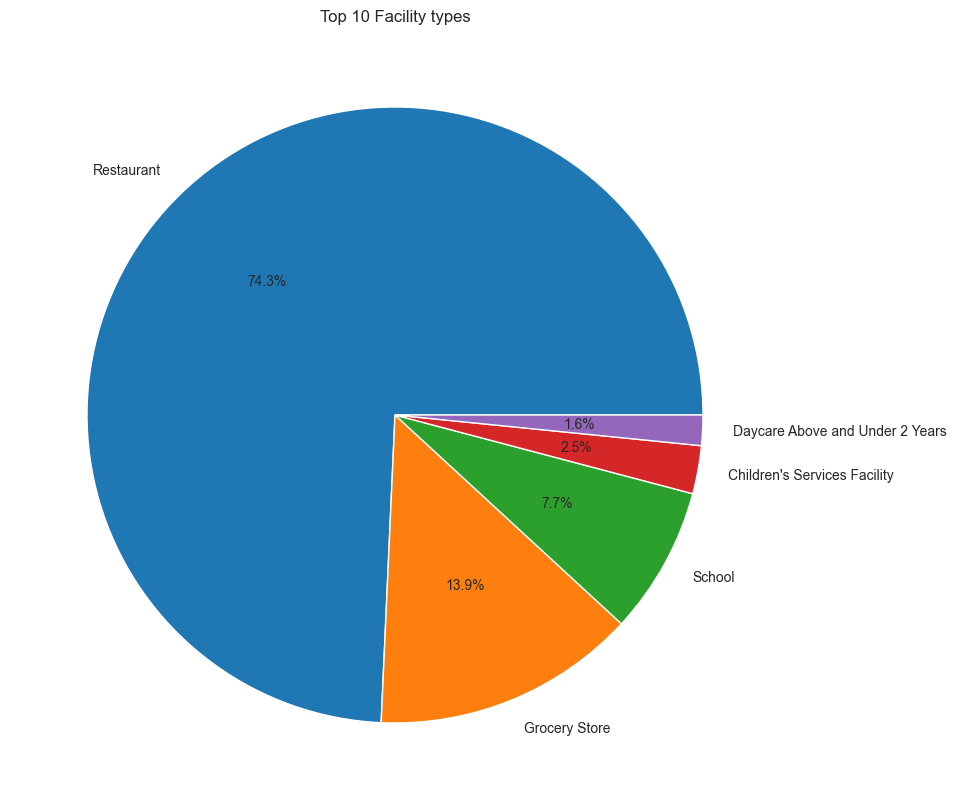

In [43]:
top_facility_types = df['Facility Type'].value_counts().head(5)

plt.figure(figsize=(10, 10))
plt.pie(top_facility_types, labels=top_facility_types.index, autopct='%1.1f%%')
plt.title('Top 10 Facility types')
plt.show()

In [44]:
df = df[df["Facility Type"].isin(["Restaurant","Grocery Store", "School"])]
df["Facility Type"].value_counts()

Facility Type
Restaurant       153810
Grocery Store     28701
School            16029
Name: count, dtype: int64

Taking only inspection date year


In [45]:
df['Inspection Date'] = pd.to_datetime(df['Inspection Date'])
df['Inspection Date'] = df['Inspection Date'].dt.year

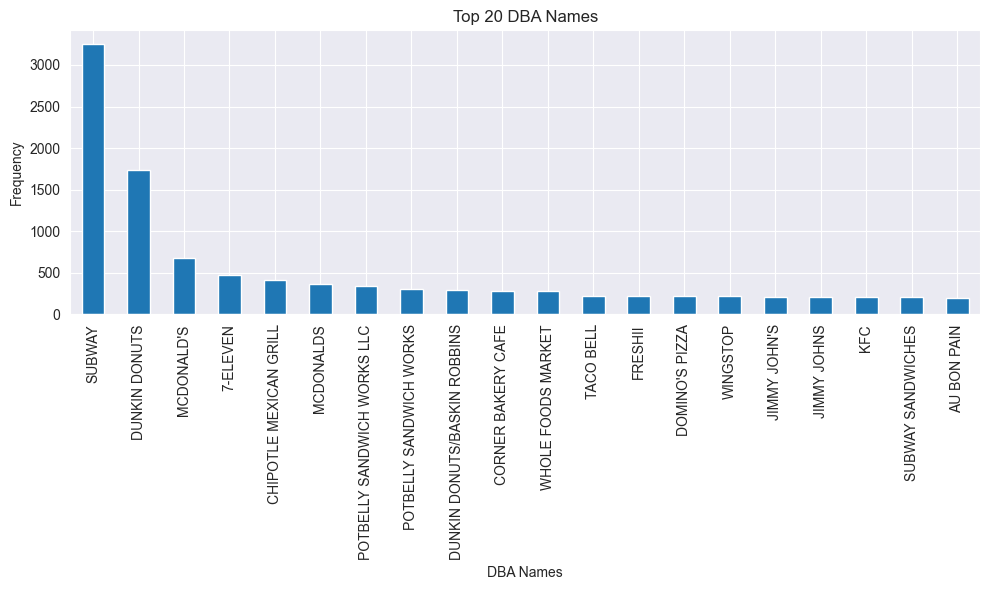

In [46]:
# TOP 20 DMA Names with their distribution of inspections
top_dba_names = df['DBA Name'].value_counts().head(20)

# Plotting the top 20 DBA Names
plt.figure(figsize=(10, 6))
top_dba_names.plot(kind='bar')
plt.title('Top 20 DBA Names')
plt.xlabel('DBA Names')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


Step 4:
Feature relevance

In [47]:

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])



In [48]:


# Separating features and target
X = df.drop('Results', axis=1)  # Features
y = df['Results']  # Target

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Calculate accuracies
dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Display accuracies
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Decision Tree Accuracy: 0.8453
Random Forest Accuracy: 0.8689


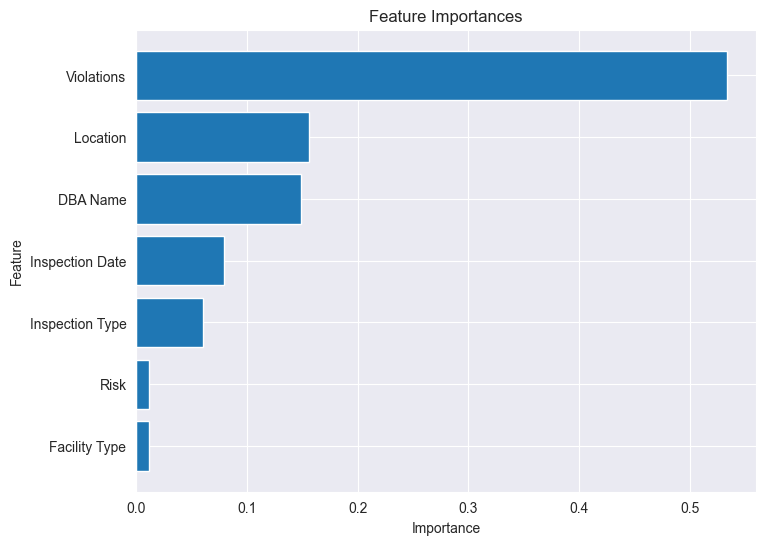

           Feature  Importance
0       Violations    0.533214
1         Location    0.155918
2         DBA Name    0.148476
3  Inspection Date    0.079019
4  Inspection Type    0.060137
5             Risk    0.011912
6    Facility Type    0.011324


In [49]:
# Get feature importances
feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plotting feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis() 
plt.show()

print(importance_df)